In [145]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt, SimpleExpSmoothing

In [146]:
sys.path.insert(1, '../')

from evaluation import get_actual_demand

### Simple Exponential Smoothing ###

In [147]:
demand = pd.read_csv('../data/demand.csv')
np.random.seed(1741)
actual_demand = get_actual_demand(demand)
actual_demand

latency_sensitivity,time_step,server_generation,high,low,medium
0,1,CPU.S1,4346,7937,9235
1,1,GPU.S1,54,12,0
2,2,CPU.S1,8039,16884,19722
3,2,GPU.S1,90,29,2
4,3,CPU.S1,12276,21346,27524
...,...,...,...,...,...
667,167,GPU.S3,2438,8754,8769
668,168,CPU.S3,18072,555302,279723
669,168,CPU.S4,9530,419377,282980
670,168,GPU.S2,555,1204,1166


In [148]:
server_demand = actual_demand.loc[(actual_demand['server_generation'] == 'GPU.S2')].copy()
ts_demand = server_demand.copy()
low = ts_demand[['time_step', 'low']].copy()


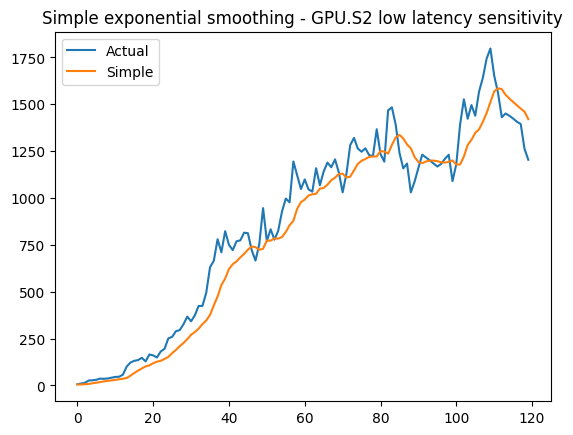

In [149]:
actual = low["low"].to_numpy()

fit1 = SimpleExpSmoothing(actual, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
timesteps = [i for i in range(1, 109)]
plt.title("Simple exponential smoothing - GPU.S2 low latency sensitivity")
plt.plot(actual, label="Actual")
plt.plot(fit1.fittedvalues, label="Simple")
plt.legend()
plt.show()

### Holt's Damped Smoothing ###

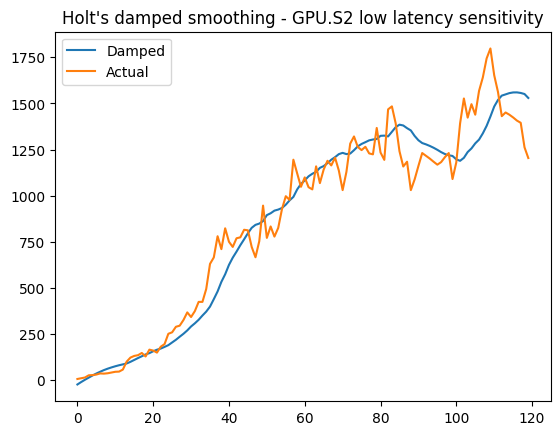

In [150]:
fit3 = Holt(actual, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.1, smoothing_trend=0.1, 
)
plt.title("Holt's damped smoothing - GPU.S2 low latency sensitivity")
plt.plot(fit3.fittedvalues, label = "Damped")
plt.plot(actual, label = "Actual")

plt.legend()
plt.show()